# Use Gemini thinking

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17), [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-03-25) and [Gemini Flash 2.0 Thinking]() are models that are
trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## Understanding the thinking models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

:::{.callout-note}

On this notebook all examples are using Gemini 2.5 Flash and the new `thinking_budget` parameter.
The `thinking_budget` parameter is not available for Gemini 2.5 Pro for now - If you want to use Gemini 2.5 Pro, you can remove the `thinking_budget` parameter from the code.

:::

## Setup

### Install the Google GenAI SDK

Install the Google GenAI SDK from [npm](https://www.npmjs.com/package/@google/genai). 

```bash
$ npm install @google/genai
```

### Setup your API key

You can [create](https://aistudio.google.com/app/apikey) your API key using Google AI Studio with a single click.

Remember to treat your API key like a password. Don't accidentally save it in a notebook or source file you later commit to GitHub. In this notebook we will be storing the API key in a `.env` file. You can also set it as an environment variable or use a secret manager. 

Here's how to set it up in a `.env` file:

```bash
$ touch .env
$ echo "GEMINI_API_KEY=<YOUR_API_KEY>" >> .env
```

:::{.callout-tip}

Another option is to set the API key as an environment variable. You can do this in your terminal with the following command:

```bash
$ export GEMINI_API_KEY="<YOUR_API_KEY>"
```
:::

### Load the API key

To load the API key from the `.env` file, we will use the `dotenv` package. This package loads environment variables from a `.env` file into `process.env`. 

```bash
$ npm install dotenv
```

Then, we can load the API key in our code:


In [1]:
const dotenv = require("dotenv") as typeof import("dotenv");

dotenv.config({
  path: "../.env",
});

const GEMINI_API_KEY = process.env.GEMINI_API_KEY ?? "";
if (!GEMINI_API_KEY) {
  throw new Error("GEMINI_API_KEY is not set in the environment variables");
}
console.log("GEMINI_API_KEY is set in the environment variables");


GEMINI_API_KEY is set in the environment variables


:::{.callout-note}
In our particular case the `.env` is is one directory up from the notebook, hence we need to use `../` to go up one directory. If the `.env` file is in the same directory as the notebook, you can omit it altogether. 

```
│
├── .env
└── quickstarts
    └── Get_started_thinking.ipynb
```
:::


### Initialize SDK Client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.


In [2]:
const google = require("@google/genai") as typeof import("@google/genai");

const ai = new google.GoogleGenAI({ apiKey: GEMINI_API_KEY });


### Select a model



In [3]:
const tslab = require("tslab") as typeof import("tslab");

const MODEL_ID = "gemini-2.5-flash-preview-05-20";


## Using the thinking models

Here are some quite complex examples of what Gemini thinking models can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini thinking models are more consistent thanks to their thinking step.

:::{.callout-note}

For now, thinking budget is a feature available for Gemini 2.5 Flash model only.

:::


### Using adaptive thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinkingBudget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.


In [4]:
const adaptive_thinking_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
    `,
  ],
});
tslab.display.markdown(adaptive_thinking_response.text ?? "");


Given your criteria, here are the most likely candidates for an aquatic mammal that doesn't live in the sea and is smaller than a cat:

1.  **Water Shrew (e.g., Common Water Shrew, American Water Shrew, Eurasian Water Shrew):**
    *   **Aquatic Mammal:** Yes, they are true mammals that are highly adapted to aquatic life, often hunting insects and small fish in streams and ponds.
    *   **Doesn't live in the sea:** Correct, they are freshwater dwellers.
    *   **Smaller than a cat:** Absolutely, they are tiny, only a few inches long, resembling a mouse with a pointed snout.

2.  **Desman (e.g., Pyrenean Desman, Russian Desman):**
    *   **Aquatic Mammal:** Yes, they are semi-aquatic insectivorous mammals related to moles, living in freshwater rivers and lakes.
    *   **Doesn't live in the sea:** Correct, exclusively freshwater.
    *   **Smaller than a cat:** Yes, their body length is usually around 4-8 inches, not including their tail, making them significantly smaller than a cat.

3.  **Water Vole:**
    *   **Aquatic Mammal:** Yes, these rodents are semi-aquatic, living along the banks of rivers, streams, and ditches, feeding on vegetation.
    *   **Doesn't live in the sea:** Correct, they are freshwater animals.
    *   **Smaller than a cat:** Yes, generally smaller than a cat, though some larger individuals might approach the size of a very small kitten.

4.  **Platypus:**
    *   **Aquatic Mammal:** Yes, it's one of only two monotremes (egg-laying mammals) and is highly aquatic.
    *   **Doesn't live in the sea:** Correct, found in freshwater rivers and lakes in Australia.
    *   **Smaller than a cat:** Yes, typically about 12-15 inches long, body-wise, which is smaller than most domestic cats.

---

### How to make sure (using 20 Questions style):

To narrow it down and confirm, you'd ask questions that target the specific characteristics and differences between these potential answers.

**General Confirming Questions:**

1.  **Is it typically found in freshwater environments like rivers, streams, or ponds?** (Confirms "doesn't live in the sea")
2.  **Is its primary diet composed of insects or small aquatic invertebrates?** (Helps differentiate shrews/desmans/platypus from voles)
3.  **Does it have webbed feet?** (Most candidates have some webbing, but it's more pronounced in desmans and platypus)
4.  **Is it native to North America, Europe, Asia, or Australia?** (Geographic location can help narrow it down significantly)

**Differentiating Questions:**

5.  **Does it lay eggs?**
    *   If **YES**: It's almost certainly a **Platypus**. (This is a huge differentiator for mammals)
    *   If **NO**: It's a placental mammal (shrew, desman, vole).

6.  **Does it have a very long, pointed snout, almost like a trunk?**
    *   If **YES**: Likely a **Desman**. (Very distinctive feature)
    *   If **NO**: Could be a shrew or vole.

7.  **Is it known for building elaborate burrows along riverbanks?**
    *   If **YES**: Could be a **Water Vole** or a **Platypus**. (Platypus builds extensive burrows; water voles are also strong burrowers).

8.  **Is it considered a rodent?**
    *   If **YES**: It's a **Water Vole**. (This would rule out shrews, desmans, and platypus as they are not rodents).

9.  **Does it have extremely small eyes and ears, often hidden in its fur?**
    *   If **YES**: Consistent with **Water Shrews** and **Desmans**, which rely more on touch and smell.

By asking a series of these specific questions, you can logically eliminate options and pinpoint the correct aquatic mammal.

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1500 tokens in the thinking steps:


In [5]:
console.log(JSON.stringify(adaptive_thinking_response.usageMetadata, null, 2));


{
  "promptTokenCount": 60,
  "candidatesTokenCount": 939,
  "totalTokenCount": 2494,
  "promptTokensDetails": [
    {
      "modality": "TEXT",
      "tokenCount": 60
    }
  ],
  "thoughtsTokenCount": 1495
}


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinkingBudget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.


In [6]:
const adaptive_thinking_response_2 = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
      You are playing the 20 question game. You know that what you are looking for
      is a aquatic mammal that doesn't live in the sea, and that's smaller than a
      cat. What could that be and how could you make sure?
      `,
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 0,
    },
  },
});
tslab.display.markdown(adaptive_thinking_response_2.text ?? "");


This is a fun one! Let's break it down.

**The Answer:**

Based on your criteria, the most likely aquatic mammal that doesn't live in the sea and is smaller than a cat is a **Pygmy Shrew (genus *Sorex* or *Suncus*)** – specifically, some species are semi-aquatic.

**Why?**

*   **Aquatic Mammal:** While many people think of shrews as terrestrial, several species are highly adapted to a semi-aquatic lifestyle, often found near streams, ponds, and wetlands. They are excellent swimmers and divers.
*   **Doesn't Live in the Sea:** They are exclusively freshwater or terrestrial/wetland creatures.
*   **Smaller Than a Cat:** Absolutely! Pygmy shrews are among the smallest mammals in the world, often weighing only a few grams and measuring just a few centimeters long, excluding the tail. They are significantly smaller than a cat.

**How could you make sure (in a 20 questions game context)?**

Here's how you could use your 20 questions to narrow it down and confirm, leading to Pygmy Shrew:

**Initial Questions to Confirm Categories:**

1.  **"Is it a mammal?"** (You already know this, but it's good to confirm the broader category for the game.)
2.  **"Does it live in water for a significant part of its life?"** (Confirming "aquatic.")
3.  **"Is its primary habitat freshwater?"** (Confirming "doesn't live in the sea.")
4.  **"Is it smaller than a typical house cat?"** (Confirming "smaller than a cat.")

**Narrowing Down Questions (if the opponent keeps saying "yes"):**

5.  **"Does it primarily eat fish or other vertebrates?"** (No - shrews primarily eat invertebrates)
6.  **"Does it have webbed feet?"** (Some semi-aquatic shrews do have fringe-like hairs that aid in swimming, but not true webbing like a duck or otter.)
7.  **"Does it lay eggs?"** (No - mammal)
8.  **"Is it a rodent?"** (No - shrews are in the order Eulipotyphla, not Rodentia)
9.  **"Does it have long, prominent whiskers?"** (Yes - shrews have very sensitive whiskers)
10. **"Is it blind or have very poor eyesight?"** (Yes - shrews rely more on hearing and smell)
11. **"Does it have a very high metabolism and need to eat constantly?"** (Yes - a key characteristic of shrews)
12. **"Does it typically live underground or in dense vegetation near water?"** (Yes)
13. **"Is it known for being extremely small, possibly one of the smallest mammals?"** (Yes!)

**Closer to the Reveal:**

14. **"Is it often mistaken for a mouse?"** (Yes, due to size and general appearance, but they are very different animals)
15. **"Does it have a long, pointed snout?"** (Yes! A defining feature of shrews.)

**Confirmation Question:**

16. **"Is it a type of shrew?"** (Hopefully "Yes!")
17. **"More specifically, is it a Pygmy Shrew or a similar very small semi-aquatic shrew?"** (This is where you'd confirm your hypothesis.)

By asking these types of questions, you'd eliminate other possibilities (like very small rodents that aren't aquatic, or larger aquatic mammals) and hone in on the unique characteristics of a Pygmy Shrew.

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:


In [7]:
console.log(JSON.stringify(adaptive_thinking_response_2.usageMetadata, null, 2));


{
  "promptTokenCount": 60,
  "candidatesTokenCount": 805,
  "totalTokenCount": 865,
  "promptTokensDetails": [
    {
      "modality": "TEXT",
      "tokenCount": 60
    }
  ]
}


### Solving a physics problem

Now, try with a simple physics comprehension example. First you can disable the `thinkingBudget` to see how the model performs:


In [8]:
const physics_problem_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
    `,
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 0,
    },
  },
});
tslab.display.markdown(physics_problem_response.text ?? "");


Here's a step-by-step calculation of the maximum bending stress in the cantilever beam:

**1. Define Given Parameters:**

*   Length of beam (L) = 3 m
*   Width of cross-section (b) = 0.1 m
*   Height of cross-section (h) = 0.2 m
*   Modulus of Elasticity (E) = 200 GPa = 200 x 10^9 N/m^2 (Note: E is not directly used for stress calculation but is usually given in beam problems)
*   Uniformly distributed load (w) = 5 kN/m = 5000 N/m
*   Point load (P) = 10 kN = 10000 N

**2. Calculate the Area Moment of Inertia (I):**

For a rectangular cross-section, the area moment of inertia about the neutral axis is:
I = (b * h^3) / 12

I = (0.1 m * (0.2 m)^3) / 12
I = (0.1 m * 0.008 m^3) / 12
I = 0.0008 m^4 / 12
I = 6.6667 x 10^-5 m^4

**3. Determine the Maximum Bending Moment (M_max):**

For a cantilever beam, the maximum bending moment occurs at the fixed support. It's the sum of the moments due to the distributed load and the point load.

*   **Moment due to uniformly distributed load (M_w):**
    M_w = w * L^2 / 2
    M_w = (5000 N/m) * (3 m)^2 / 2
    M_w = 5000 N/m * 9 m^2 / 2
    M_w = 45000 Nm / 2
    M_w = 22500 Nm

*   **Moment due to point load (M_P):**
    M_P = P * L
    M_P = (10000 N) * (3 m)
    M_P = 30000 Nm

*   **Total Maximum Bending Moment (M_max):**
    M_max = M_w + M_P
    M_max = 22500 Nm + 30000 Nm
    M_max = 52500 Nm

**4. Determine the Distance to the Extreme Fiber (y_max):**

For a rectangular cross-section, the neutral axis is at the geometric center. The maximum stress occurs at the top or bottom surface.
y_max = h / 2

y_max = 0.2 m / 2
y_max = 0.1 m

**5. Calculate the Maximum Bending Stress (σ_max):**

The bending stress formula is:
σ_max = (M_max * y_max) / I

σ_max = (52500 Nm * 0.1 m) / (6.6667 x 10^-5 m^4)
σ_max = 5250 Nm^2 / (6.6667 x 10^-5 m^4)
σ_max = 78749439.06 N/m^2

Convert to Pascals (Pa) or MegaPascals (MPa):
σ_max = 78,749,439.06 Pa
σ_max ≈ 78.75 x 10^6 Pa
σ_max ≈ 78.75 MPa

**Conclusion:**

The maximum bending stress in the cantilever beam is approximately **78.75 MPa**.

You can see that the model used no tokens for the thinking step:


In [9]:
console.log(JSON.stringify(physics_problem_response.usageMetadata, null, 2));


{
  "promptTokenCount": 97,
  "candidatesTokenCount": 871,
  "totalTokenCount": 968,
  "promptTokensDetails": [
    {
      "modality": "TEXT",
      "tokenCount": 97
    }
  ]
}


Then you can set a fixed maximum budget (`thinkingBudget=4096`, or 4096 tokens) for the thinking step to see how the model performs.

You can see that, even producing a similar result for the same prompt, the amount of details shared in the answer makes it deeper and more consistent.


In [10]:
const physics_problem_response_2 = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
      A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
      It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
      Calculate the maximum bending stress (σ_max).
      `,
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 4096,
    },
  },
});
tslab.display.markdown(physics_problem_response_2.text ?? "");


To calculate the maximum bending stress (σ_max) in the cantilever beam, we need to follow these steps:

1.  **Calculate the moment of inertia (I) of the cross-section.**
2.  **Determine the maximum bending moment (M_max) acting on the beam.**
3.  **Calculate the maximum distance (y_max) from the neutral axis to the extreme fiber.**
4.  **Apply the bending stress formula: σ_max = (M_max * y_max) / I.**

Let's break down each step:

**Given Data:**
*   Length L = 3 m
*   Width b = 0.1 m
*   Height h = 0.2 m
*   Young's Modulus E = 200 GPa = 200 × 10^9 Pa (or N/m²) - *Note: E is not needed for stress calculation directly, only for deflection.*
*   Uniformly distributed load w = 5 kN/m = 5 × 10^3 N/m
*   Point load P = 10 kN = 10 × 10^3 N

---

**1. Calculate the Moment of Inertia (I) for a rectangular cross-section:**
The formula for the moment of inertia of a rectangle about its centroidal axis is:
I = (b * h^3) / 12

I = (0.1 m * (0.2 m)^3) / 12
I = (0.1 * 0.008) / 12
I = 0.0008 / 12
I = 6.6667 × 10^-5 m^4

---

**2. Determine the Maximum Bending Moment (M_max):**
For a cantilever beam, the maximum bending moment occurs at the fixed support (where it connects to the wall). We need to sum the moments caused by each load at this point.

*   **Moment due to the point load P at the free end (M_P):**
    M_P = P * L
    M_P = (10 × 10^3 N) * (3 m)
    M_P = 30 × 10^3 N·m = 30 kN·m

*   **Moment due to the uniformly distributed load w along the entire length (M_w):**
    This can be thought of as a concentrated load (w * L) acting at the centroid of the distributed load, which is L/2 from the fixed support.
    M_w = (w * L) * (L/2)
    M_w = w * L^2 / 2
    M_w = (5 × 10^3 N/m) * (3 m)^2 / 2
    M_w = (5 × 10^3 * 9) / 2
    M_w = 45 × 10^3 / 2
    M_w = 22.5 × 10^3 N·m = 22.5 kN·m

*   **Total Maximum Bending Moment (M_max):**
    M_max = M_P + M_w
    M_max = 30 × 10^3 N·m + 22.5 × 10^3 N·m
    M_max = 52.5 × 10^3 N·m = 52.5 kN·m

---

**3. Calculate the Maximum Distance (y_max) from the neutral axis:**
For a rectangular cross-section, the neutral axis is at the geometric center, and the maximum distance to the extreme fibers (top or bottom surface) is half the height.
y_max = h / 2
y_max = 0.2 m / 2
y_max = 0.1 m

---

**4. Apply the Bending Stress Formula (σ_max):**
The maximum bending stress occurs at the location of M_max (fixed support) and at y_max (top/bottom surface).
σ_max = (M_max * y_max) / I

σ_max = ( (52.5 × 10^3 N·m) * (0.1 m) ) / (6.6667 × 10^-5 m^4)
σ_max = (5.25 × 10^3 N·m²) / (6.6667 × 10^-5 m^4)
σ_max = 78,750,000 N/m²

Convert to Megapascals (MPa), where 1 MPa = 10^6 Pa:
σ_max = 78.75 × 10^6 Pa
σ_max = 78.75 MPa

---

**Final Answer:**
The maximum bending stress (σ_max) in the cantilever beam is **78.75 MPa**.

Now you can see that the model used around 1300 tokens for the thinking step (not necessarily using the full budget you set):


In [11]:
console.log(JSON.stringify(physics_problem_response_2.usageMetadata, null, 2));


{
  "promptTokenCount": 97,
  "candidatesTokenCount": 1125,
  "totalTokenCount": 2564,
  "promptTokensDetails": [
    {
      "modality": "TEXT",
      "tokenCount": 97
    }
  ],
  "thoughtsTokenCount": 1342
}


### Working with multimodal problems

This geometry problem requires complex reasoning and is also using Gemini multimodal abilities to read the image. In this case, you are fixing a value to the `thinkingBudget` so the model will use up to 8196 tokens for the thinking step.


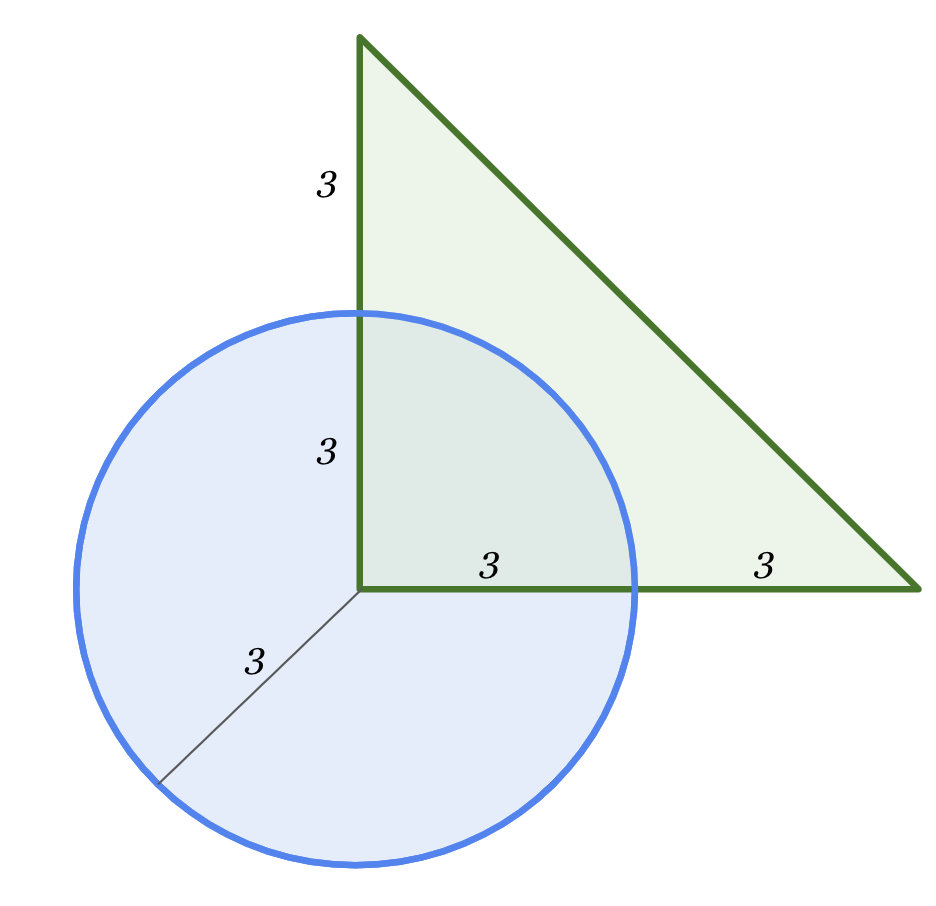

In [14]:
const fs = require("fs") as typeof import("fs");
const path = require("path") as typeof import("path");

const IMG_URL = "https://storage.googleapis.com/generativeai-downloads/images/geometry.png";

const downloadFile = async (url: string, filePath: string) => {
  if (!fs.existsSync(path.dirname(filePath))) {
    fs.mkdirSync(path.dirname(filePath), { recursive: true });
  }
  const response = await fetch(url);
  if (!response.ok) {
    throw new Error(`Failed to download file: ${response.statusText}`);
  }
  const buffer = await response.blob();
  const bufferData = Buffer.from(await buffer.arrayBuffer());
  fs.writeFileSync(filePath, bufferData);
};

const geometry_img_path = path.join("../assets/thinking", "geometry.png");
await downloadFile(IMG_URL, geometry_img_path);
tslab.display.png(fs.readFileSync(geometry_img_path));


In [15]:
const image_file = await ai.files.upload({
  file: geometry_img_path,
  config: {
    mimeType: "image/png",
    displayName: "geometry.png",
  },
});

const geometry_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    google.createPartFromUri(image_file.uri ?? "", image_file.mimeType ?? "image/png"),
    "What's the area of the overlapping region?",
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 8192,
    },
  },
});
tslab.display.markdown(geometry_response.text ?? "");


Let's break down the problem by identifying the shapes and their dimensions from the given image.

1.  **The Circle:**
    *   The numbers '3' within the blue circle clearly indicate that the radius of the circle, `r`, is 3.
    *   The green lines originating from the center of the circle (which is also the right-angle vertex of the triangle) extend along the axes. These lines form a right angle (90 degrees), indicating that the portion of the circle relevant to the overlap is a quarter circle.
    *   The area of a full circle is `πr²`. The area of this quarter circle is `(1/4)πr² = (1/4)π(3)² = 9π/4`.

2.  **The Triangle:**
    *   It's a right-angled triangle, with its right angle coinciding with the center of the circle. Let's place this vertex at the origin (0,0) of a coordinate system.
    *   The vertical leg has a '3' next to it, indicating its length is 3. So, this leg extends from (0,0) to (0,3).
    *   The horizontal leg has two '3's next to it. This means its total length is `3 + 3 = 6`. So, this leg extends from (0,0) to (6,0).
    *   The vertices of the triangle are (0,0), (6,0), and (0,3).
    *   The hypotenuse connects (0,3) and (6,0). The equation of the line passing through these points can be found:
        Slope `m = (0 - 3) / (6 - 0) = -3/6 = -1/2`.
        Using the point-slope form `y - y1 = m(x - x1)` with (6,0): `y - 0 = (-1/2)(x - 6)`, so `y = -1/2 x + 3`.

3.  **The Overlapping Region:**
    *   The green-shaded area represents the overlapping region between the circle and the triangle.
    *   This region is bounded by the x-axis, the y-axis, the hypotenuse of the triangle, and the arc of the circle.
    *   We need to determine which boundary is "inner" in the first quadrant.
    *   The hypotenuse `y = -1/2 x + 3` intersects the circle `x² + y² = 3²` at two points. Let's find them:
        Substitute `y` from the line equation into the circle equation:
        `x² + (-1/2 x + 3)² = 9`
        `x² + (1/4 x² - 3x + 9) = 9`
        `5/4 x² - 3x = 0`
        Factor out `x`: `x(5/4 x - 3) = 0`
        This gives two solutions for `x`:
        *   `x = 0`: If `x=0`, then `y = -1/2(0) + 3 = 3`. This is the point (0,3). This point is a vertex of the triangle and also on the circle (0² + 3² = 9).
        *   `5/4 x - 3 = 0`: `5/4 x = 3` => `x = 12/5 = 2.4`. If `x=2.4`, then `y = -1/2(2.4) + 3 = -1.2 + 3 = 1.8`. This is the point (2.4, 1.8). Let's call this point `P = (2.4, 1.8)`. We check if it's on the circle: `2.4² + 1.8² = 5.76 + 3.24 = 9`. Yes, it is.

    *   Now we understand the boundaries of the overlapping region:
        *   It starts at the origin (0,0).
        *   It goes up along the y-axis to (0,3).
        *   Then it follows the hypotenuse (line segment from (0,3) to (2.4, 1.8)).
        *   From (2.4, 1.8), it follows the arc of the circle to (3,0) (the point where the circle intersects the positive x-axis).
        *   Finally, it goes along the x-axis back to the origin (0,0).

    *   We can calculate this area by splitting it into two parts:
        1.  A polygon (a trapezoid or a triangle + rectangle)
        2.  A circular sector.

    *   **Method 1: Decomposition**
        Let O = (0,0), A = (0,3), P = (2.4, 1.8), B = (3,0).
        The overlapping region is the area of quadrilateral OAPB.
        We can split it into:
        *   **Triangle OAP'**: A triangle with vertices O=(0,0), A=(0,3), and P=(2.4, 1.8). The area of a triangle given coordinates (0,0), (x1, y1), (x2, y2) is `1/2 |x1*y2 - x2*y1|`. This is simpler. Using the base along y-axis, (0,3) as vertex A, and (0,0) as vertex O, and the x-coordinate of P as height: `Area(OAP) = (1/2) * base * height = (1/2) * OA * (x-coordinate of P) = (1/2) * 3 * 2.4 = 3.6`.
        *   **Circular Sector OPB**: A sector of the circle with radius 3, from the x-axis (angle 0) to the angle `θ` corresponding to point P=(2.4, 1.8).
            We find `cos(θ) = x/r = 2.4/3 = 4/5` and `sin(θ) = y/r = 1.8/3 = 3/5`. So, `θ = arcsin(3/5)`.
            The angle for point B=(3,0) is `0` radians.
            The angle for point P=(2.4,1.8) is `θ = arcsin(3/5)`.
            Area of sector OPB = `(1/2)r² * (angle in radians) = (1/2)(3)² * arcsin(3/5) = (9/2)arcsin(3/5)`.

        *   Total Area = Area(OAP) + Area(Sector OPB)
            Total Area = `3.6 + (9/2)arcsin(3/5)`.

    *   **Method 2: Integration**
        The area can be expressed as the sum of two integrals:
        `Area = ∫[from 0 to 2.4] (-1/2 x + 3) dx + ∫[from 2.4 to 3] sqrt(9 - x²) dx`
        The first integral calculates the area under the hypotenuse from x=0 to x=2.4. This is a trapezoid with vertices (0,0), (2.4,0), (2.4,1.8), (0,3). Its area is `(1/2) * (3 + 1.8) * 2.4 = (1/2) * 4.8 * 2.4 = 5.76`.
        The second integral calculates the area under the circle's arc from x=2.4 to x=3. This is `[ (x/2)sqrt(9 - x²) + (9/2)arcsin(x/3) ] from 2.4 to 3`.
        Evaluating at `x=3`: `(3/2)sqrt(0) + (9/2)arcsin(1) = 9π/4`.
        Evaluating at `x=2.4`: `(2.4/2)sqrt(9 - 2.4²) + (9/2)arcsin(2.4/3)`
        `= 1.2 * sqrt(9 - 5.76) + (9/2)arcsin(0.8)`
        `= 1.2 * sqrt(3.24) + (9/2)arcsin(4/5)`
        `= 1.2 * 1.8 + (9/2)arcsin(4/5)`
        `= 2.16 + (9/2)arcsin(4/5)`.
        So the second integral's value is `9π/4 - (2.16 + (9/2)arcsin(4/5))`.
        Total Area = `5.76 + 9π/4 - 2.16 - (9/2)arcsin(4/5)`
        Total Area = `3.6 + 9π/4 - (9/2)arcsin(4/5)`.

        We know that `arcsin(4/5) = π/2 - arcsin(3/5)`. (Since `sin(θ) = 3/5` means `cos(θ) = 4/5`, so `θ` is `arcsin(3/5)` and `π/2 - θ` is `arccos(3/5)` or `arcsin(4/5)`).
        Substitute this into the expression:
        `Total Area = 3.6 + 9π/4 - (9/2)(π/2 - arcsin(3/5))`
        `= 3.6 + 9π/4 - 9π/4 + (9/2)arcsin(3/5)`
        `= 3.6 + (9/2)arcsin(3/5)`.
        Both methods yield the same result.

The area of the overlapping region is `3.6 + (9/2)arcsin(3/5)`.

The final answer is $\boxed{3.6 + \frac{9}{2}\arcsin\left(\frac{3}{5}\right)}$

### Solving brain teasers

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinkingBudget` so the model will use up to 24576 tokens for the thinking step


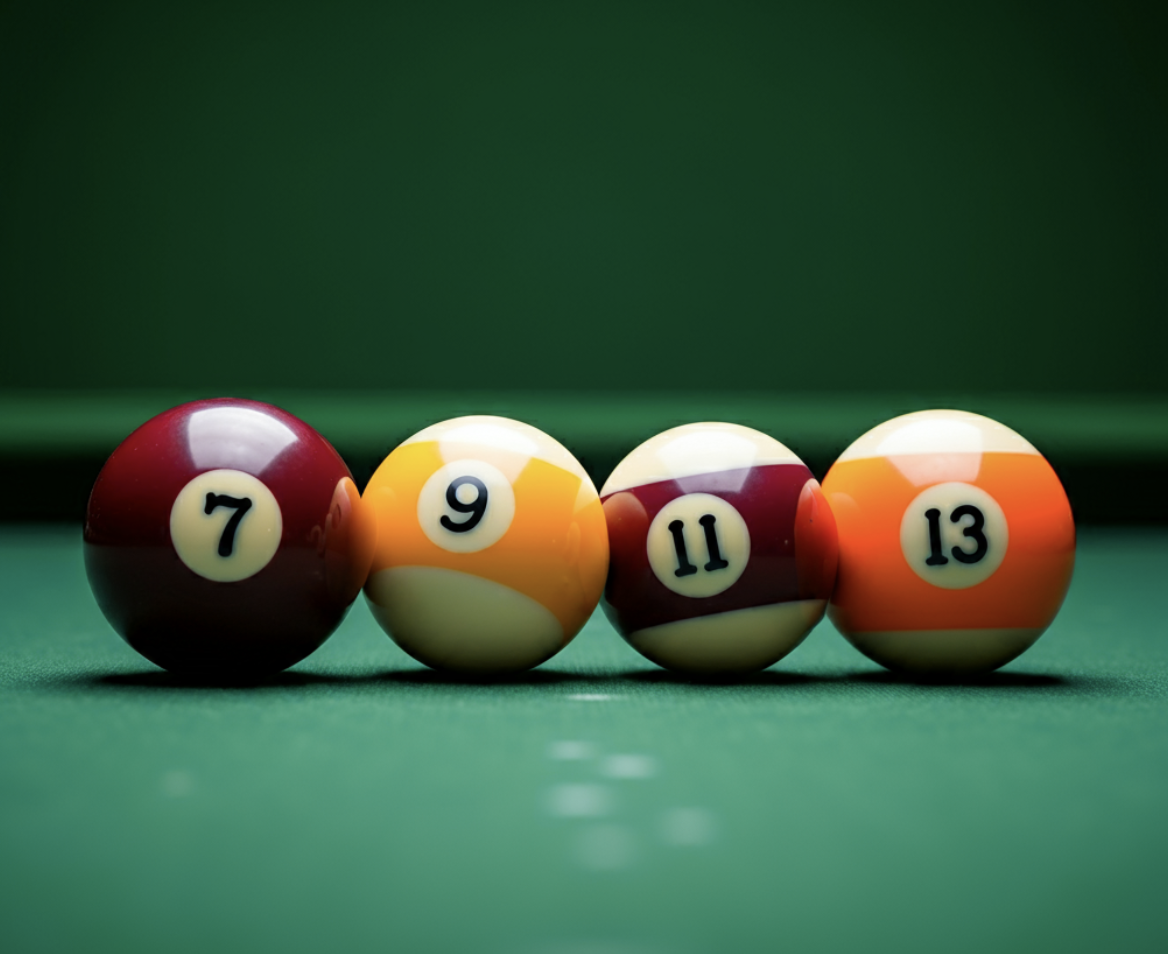

In [16]:
const POOL_IMG_URL = "https://storage.googleapis.com/generativeai-downloads/images/pool.png";

const pool_img_path = path.join("../assets/thinking", "pool.png");
await downloadFile(POOL_IMG_URL, pool_img_path);
tslab.display.png(fs.readFileSync(pool_img_path));


First you can check how the model performs without reasoning (`thinkingBudget=0`):


In [17]:
const pool_image_file = await ai.files.upload({
  file: pool_img_path,
  config: {
    mimeType: "image/png",
    displayName: "pool.png",
  },
});
const pool_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    google.createPartFromUri(pool_image_file.uri ?? "", pool_image_file.mimeType ?? "image/png"),
    "How do I use those three pool balls to sum up to 30?",
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 0,
    },
  },
});
tslab.display.markdown(pool_response.text ?? "");


This is a classic riddle! Here's how you can do it:

You can sum up to 30 using three of the pool balls by **flipping the number "9" upside down to make it a "6"**.

Then you have:

* **7**
* **6** (from the flipped 9)
* **13**

**7 + 6 + 13 = 26**

Ah, I re-read your request and realized you need to **sum to 30, not 26**. My apologies. Let's try again with the balls available: 7, 9, 11, 13.

The numbers on the balls are 7, 9, 11, and 13. All of these are odd numbers.

**The sum of any three odd numbers will always be an odd number.**

Since 30 is an even number, it's **impossible** to sum to 30 using only three of these particular pool balls (7, 9, 11, 13) in their given numerical values.

Therefore, the only way to solve this riddle is usually by **flipping the 9 to make it a 6**. However, that would only get you to 26, as I demonstrated above.

**If the rule is that you must use *only* the numbers as they appear on the balls (7, 9, 11, 13) and can't flip any numbers, then it's a trick question and it's impossible.**

As you can notice, the model struggled to find a way to get to the result - and ended up suggesting to use different pool balls.

Now you can use the model reasoning to solve the riddle:


In [18]:
const pool_response_2 = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    google.createPartFromUri(pool_image_file.uri ?? "", pool_image_file.mimeType ?? "image/png"),
    "How do I use those three pool balls to sum up to 30?",
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 24576,
    },
  },
});
tslab.display.markdown(pool_response_2.text ?? "");


This is a classic riddle!

You need to use the trick of **flipping the 9 ball upside down to make it a 6**.

Then, you can use these three balls:

*   **6** (the flipped 9 ball)
*   **11**
*   **13**

**6 + 11 + 13 = 30**

### Solving a math puzzle with the maximum `thinkingBudget`

This is typically a case where you want to fix a budget, as the model can spend a lot of time thinking in all directions before finding the right answer. It should not be too low either as non-thinking models have trouble with such questions.

Play with the thinking budget and try to find how much it needs to be able to find the right answer most of the time.


In [19]:
const math_problem_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
    How can you obtain 565 with 10 8 3 7 1 and 5 and the common operations?
    You can only use a number once.
    `,
  ],
  config: {
    thinkingConfig: {
      thinkingBudget: 24576,
    },
  },
});
tslab.display.markdown(math_problem_response.text ?? "");


Here's how you can obtain 565 using the given numbers and common operations:

1.  Multiply 8 by 7:
    8 * 7 = 56

2.  Multiply the result by 10:
    56 * 10 = 560

3.  Add 5 to the result:
    560 + 5 = 565

So, the full expression is:
**(8 * 7 * 10) + 5 = 565**

Numbers used: 8, 7, 10, 5 (each used only once).
Numbers not used: 3, 1 (which is allowed).

### Working thoughts summaries

Summaries of the model's thinking reveal its internal problem-solving pathway. Users can leverage this feature to check the model's strategy and remain informed during complex tasks.

For more details about Gemini 2.5 thinking capabilities, take a look at the [Gemini models thinking guide](https://googledevai.devsite.corp.google.com/gemini-api/docs/thinking#summaries).


In [20]:
const thought_experiment_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
    Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
    The person who lives in the red house owns a cat.
    Bob does not live in the green house.
    Carol owns a dog.
    The green house is to the left of the red house.
    Alice does not own a cat.
    Who lives in each house, and what pet do they own?
    `,
  ],
  config: {
    thinkingConfig: {
      includeThoughts: true,
    },
  },
});


You can check both the thought summaries and the final model response:


In [22]:
for (const part of thought_experiment_response.candidates?.[0]?.content?.parts ?? []) {
  if (!part.text) continue;
  if (part.thought) {
    tslab.display.markdown(`## **Thought Summary**`);
    tslab.display.markdown(part.text ?? "");
  } else {
    tslab.display.markdown(`## **Response**`);
    tslab.display.markdown(part.text ?? "");
  }
}


## **Thought Summary**

**Initial Thoughts and Problem Decomposition**

Alright, let's break this down. The goal is to match people to houses and pets. I'm thinking a table or matrix is the best way to keep track of this. I need to list all the entities: people (Alice, Bob, Carol), houses (red, green, blue), and pets (cat, dog, and implicitly a third, or maybe not). I'll go through the clues one by one and mark my deductions. This is all about finding relationships and cross-references.

**Processing the Clues and Building Deductions**

First clue: Red house = Cat. Easy. Then, Bob doesn't live in the green house. Noted. Carol owns a dog. Alright, Carol = Dog. The green house is to the left of the red house. Got it, Green < Red. Alice doesn't own a cat. Now things get interesting!

I'm starting to see some links here. If the red house has a cat and Alice doesn't, Alice can't be in the red house. And since Carol has a dog and the red house has the cat, Carol can't be in the red house either. That leaves Bob!  Bob must be in the Red House with the Cat.  Major breakthrough!

**Filling the Gaps and Combining Information**

Now, I know Bob is in the red house. Bob does *not* live in the green house, that's already true. I know Carol owns a dog.  The houses are arranged Green < Red < Blue. So Green is to the left of Bob. That's clear.

So, it's either Green, Red, Blue OR Blue, Green, Red. Because Bob is in the Red House, it becomes Green, Bob (Red), Blue. Carol owns the dog, Alice is left. I'm at the point now where I'm trying to decide the houses for the dog and Alice!

Carol must have the dog in Green or Blue house. No direct information!

**Confronting the Ambiguity and Re-Evaluating**

Hmm, this is tricky. No clue is helping me directly match either Carol to Green, or Carol to Blue. I need to rethink the pets. Is there an unstated assumption here? It seems to imply that everyone has a named pet but I'm not seeing how to pair them. I've re-read the puzzle and clues many times.

If Carol owns the dog, and Bob owns the cat, then what about Alice? No specific pet is associated with Alice. This implies Alice has the unnamed pet or none. My working theory is that there's an ambiguity in the pet assignments.

The crucial constraint is that the green house is to the left of the red house. In three possible arrangements: Green - Red - Blue, Blue - Green - Red, and Green - Blue - Red. I know Bob lives in the Red House, with the cat, that means it's Green - Bob (Red) - Blue. Then I need to decide, who lives in which house?

Carol owns the Dog and must be in either the Green or Blue house! Alice is the remaining house. There's nothing that helps me, at all, decide which person is in what color house, for green and blue!

**Acknowledging the Underspecification**

There seems to be an ambiguity here. This is a common situation with these puzzles! There might be an unstated assumption that everyone must have a pet in this context. However, I'm stuck with two possible solutions for Alice and Carol, and I don't see any logic to eliminate either of these solutions.

**Finalized Solution & Acknowledgment of Limitations**

So, the definite part is: Bob lives in the Red House and owns the Cat. The green house is to the left of Bob's red house.

There are two possibilities:

*   Carol (Dog) is in the Green House, Alice owns the "unspecified" pet, and lives in Blue house
*   Carol (Dog) is in the Blue House, Alice owns the "unspecified" pet, and lives in Green house

I can't pinpoint a specific pet for Alice. Unless there's an extremely subtle detail, these are the only two possible consistent solutions.


## **Response**

Let's break this down clue by clue to solve the puzzle:

1.  **"The person who lives in the red house owns a cat."**
    *   Deduction: Red House = Cat Owner.

2.  **"Carol owns a dog."**
    *   Deduction: Carol = Dog.

3.  **"Alice does not own a cat."**
    *   Deduction: Alice is not the Cat Owner.

4.  **Combine 1, 2, and 3:**
    *   The Red House owner has a cat.
    *   Alice does not own a cat, so Alice doesn't live in the Red House.
    *   Carol owns a dog, so Carol doesn't live in the Red House (because the Red House has a cat).
    *   This leaves only one person for the Red House: **Bob**.
    *   **Deduction:** Bob lives in the **Red House** and owns a **Cat**.

5.  **"Bob does not live in the green house."**
    *   This is consistent with our deduction that Bob lives in the Red House. No new information for Bob, but confirms our path.

6.  **"The green house is to the left of the red house."**
    *   We have three houses: Red, Green, Blue.
    *   Since Green is to the left of Red, and Bob lives in the Red house, the houses must be in this order from left to right: **Green, Red, Blue**.
    *   So:
        *   Left house: Green
        *   Middle house: Red (Bob, Cat)
        *   Right house: Blue

7.  **Final Assignments for Alice and Carol:**
    *   We know Bob lives in the Red House and owns a cat.
    *   The remaining houses are Green and Blue.
    *   The remaining people are Alice and Carol.
    *   We know Carol owns a dog.
    *   Alice does not own a cat (which is already true, as Bob owns the cat).

    At this point, the puzzle has two possible solutions for Alice and Carol's locations and pets, as there's no further information to distinguish between them:

    **Possibility 1:**

    *   **Green House:** Carol, who owns a dog.
    *   **Red House:** Bob, who owns a cat.
    *   **Blue House:** Alice, whose pet is not specified by the clues (or she owns no pet explicitly mentioned).

    **Possibility 2:**

    *   **Green House:** Alice, whose pet is not specified by the clues (or she owns no pet explicitly mentioned).
    *   **Red House:** Bob, who owns a cat.
    *   **Blue House:** Carol, who owns a dog.

**Summary of the solution:**

*   **Bob:** Lives in the **Red House** and owns a **Cat**.

And then, there are two possibilities for Alice and Carol:

*   **Scenario A:**
    *   **Carol:** Lives in the **Green House** and owns a **Dog**.
    *   **Alice:** Lives in the **Blue House** and her pet is not specified (or she owns no pet explicitly mentioned by the clues).

*   **Scenario B:**
    *   **Alice:** Lives in the **Green House** and her pet is not specified (or she owns no pet explicitly mentioned by the clues).
    *   **Carol:** Lives in the **Blue House** and owns a **Dog**.

You can also use see the thought summaries in streaming experiences:


In [5]:
const thought_experiment_streaming_response = await ai.models.generateContentStream({
  model: MODEL_ID,
  contents: [
    `
    Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue.
    The person who lives in the red house owns a cat.
    Bob does not live in the green house.
    Carol owns a dog.
    The green house is to the left of the red house.
    Alice does not own a cat.
    Who lives in each house, and what pet do they own?
    `,
  ],
  config: {
    thinkingConfig: {
      includeThoughts: true,
    },
  },
});

let thoughts = "";
let answers = "";

for await (const chunk of thought_experiment_streaming_response) {
  for (const part of chunk.candidates?.[0]?.content?.parts ?? []) {
    if (!part.text) continue;
    if (part.thought) {
      if (!thoughts) tslab.display.markdown(`## **Thought Summary**`);
      tslab.display.markdown(part.text ?? "");
      thoughts += part.text ?? "";
    } else {
      if (!answers) tslab.display.markdown(`## **Response**`);
      tslab.display.markdown(part.text ?? "");
      answers += part.text ?? "";
    }
  }
}


## **Thought Summary**

**Unpacking the Clues**

I've finally started unpacking the core clues of this riddle. Initially, I felt overwhelmed, but now I'm making progress, mapping the houses and pets. I am focusing on eliminating possibilities based on the given constraints. I'm building a matrix to track the relationships, and I think I'm getting close to a breakthrough.




**Deciphering Relationships**

I'm now diving deeper into the relationships, having established my basic grid. The initial structure feels solid, but the spatial aspect is intriguing. I'm focusing on parsing the first clue about the colors and people, attempting to lay out all permutations and how they impact each other. Right now I am focusing on eliminating contradictory arrangements.




**Connecting the Dots**

I've been meticulously placing clues into the grid, leveraging the established structure. Carol's dog, and the red house's cat, are forming key anchors. The spatial clue ("Green to the left of Red") is proving particularly useful in limiting the possibilities. I'm focusing on the constraints imposed by Bob and Alice to further refine the arrangement.




**Constructing the Solution**

The connections are solidifying. I'm now leveraging the logical deductions to finalize the grid, focusing on the house colors. With Bob in Red, and the positional clue about Green, it is starting to become clearer. Determining Alice's house is key. I'm getting close to the definitive answer.




**Unveiling the Arrangement**

I've finally pinpointed that Bob lives in the red house and owns the cat. Leveraging the spatial clue, I'm now certain Green is to the left of Red. I am determining who lives in the Green and Blue houses and with what pet. I am now working through the final constraint with a clearer picture of the arrangement.




**Solidifying the Grid**

I'm making progress, but still need to determine who owns the third pet, and whose house is blue. The structure feels much more concrete. Carol owns the dog, and Alice does not own the cat. I am refining the arrangement and building a solution that reflects all the constraints.




**Mapping the Solution**

The riddle's framework is solidifying. I've placed Bob in the red house with the cat and Carol owning the dog. The positional information about the green house being left of the red is proving key. I'm focusing on Alice's location and what pet she must have. It's becoming clearer.





**Solving the Riddle**

I've been working through the clues, using both spatial and direct-relationship constraints to build the solution. Determining Alice and Carol's houses and pets is the current focus, after correctly placing Bob in the Red house. I am now working through the final house and pet associations.




**Mapping the Final Associations**

I'm zeroing in on the final pieces. Carol and Alice have their houses, the positional clue is helpful. Bob is confirmed in the Red house. The pet situation feels resolved. My primary focus is establishing the definitive house and pet assignments. I'm now certain of the solution.




**Solving the Puzzle**

I've been meticulously following the clues. After placing Bob in the red house with the cat and Carol with the dog, I realized that the "green to the left of red" clue solidifies the positional layout. Now, I'm focusing on Alice and the unknown pet. I'm getting closer to a complete solution.




**Solving the Puzzle**

I'm now integrating the spatial clue with the pet ownership information, focusing on the house colors. I've placed Bob in the red house with the cat, confirming the first part of the riddle.  Determining Alice's association with a house and pet will lead to the final answer. I am making rapid progress now.




**Revising the Structure**

After evaluating multiple permutations, I've confirmed Bob lives in the red house with the cat. Carol and Alice occupy the green and blue houses respectively. I'm building out the final assignments for each person and pet.




**Analyzing the Structure**

After assessing multiple structures, I've confirmed Bob lives in the red house with the cat, leveraging all available clues. Carol resides in the green house and owns the dog. I am now certain Alice resides in the blue house.




**Analyzing the Solution**

The riddle's central structure is now solid. Bob lives in the red house, and Carol resides in the green house with her dog, while Alice is confirmed to be in the blue house. The association with the unknown pet is no longer an issue, because the prompt never mentioned a specific pet, only that she did not own a cat. The solution's finality is clear.




**Analyzing the Solution Space**

I'm now zeroing in on a critical point. I've deduced Bob lives in the red house with the cat, a solid foundation. The challenge is assigning Carol and Alice's homes and pets. Currently, their assignments are interchangeable, and the current clues don't break the tie. I'll re-evaluate the spatial constraints for clarity.




**Analyzing the Structure**

It's clear that Bob lives in the red house with the cat, a solid foundation. While Carol owns the dog, I'm still weighing the possibilities for Alice's home and pet situation. The green house to the left of the red house gives an additional hint. My focus is finalizing Carol and Alice's houses.




**Analyzing the Structure**

It's clear Bob lives in the red house with the cat and Carol has the dog. I've placed the Green house to the left of Red. The final piece is linking Alice with Green or Blue, which remains flexible. I'm focusing on Alice's association and which pet she may have.




**Re-evaluating the Structure**

After solidifying the core relationships, I am evaluating possible permutations, leveraging the established base. Bob is confirmed in the red house, leaving the assignment of Carol and Alice's homes open. I am focusing on positional constraints to determine the definitive assignments. The final answer feels close.




**Analyzing the Solution Space**

I'm wrestling with the final assignments, as the two remaining arrangements feel equally valid. Bob is definitively in the red house with the cat, and Carol has the dog. My attention is on Alice, the remaining house, and the "not cat" clue. I must ensure I do not over-interpret the final constraints. I'm focusing on the spatial and relational aspects.




**Mapping the Final Associations**

The riddle's structure is clear. Bob is in the red house with the cat, and Carol has the dog. The spatial clue about the green house being left of the red is key. My focus is finalizing Alice's location and possible pet. It's becoming clearer.




**Re-evaluating the Structure**

The solution feels very clear; however, I am now focused on a possible "no pet" scenario. Alice's "not cat" clue makes me consider she owns nothing, or, perhaps, a pet we are not privy to. Since there are only two pets, "no pet" seems the implicit rule.




**Finalizing the Arrangements**

I am now certain that Bob lives in the red house with the cat, confirming the grid's structure. By deducing Alice's and Carol's possible arrangements, their final assignments should be easier to deduce. However, the constraints are a little tricky. I'm focusing on Alice's pet status.




**Analyzing the Structure**

It's clear that Bob lives in the red house with the cat and Carol resides in the green house with her dog, while Alice is confirmed to be in the blue house. It is starting to feel conclusive, as the solution now is clear. 




**Analyzing the Structure**

It's clear I'm working through the connections between the people, houses, and pets with diligence. Bob in the red house with the cat is now firmly established. Carol and Alice occupy green and blue houses respectively. I'm focusing on the final assignment to make a fully conclusive solution.




**Finalizing the Solution**

The connections are established. I've placed Bob in the red house with the cat, leveraging all available clues. Carol resides in the green house and owns the dog, while Alice is confirmed in the blue house. The association with the unknown pet is no longer an issue, because the prompt never mentioned a specific pet. The solution's finality is clear.




**Synthesizing the Solution**

The riddle's structure is clear, and I've placed Bob in the red house with the cat, leveraging all of the clues. The spatial clue about the green house being to the left of the red is also key. However, I am still trying to determine the relationship between Alice, Carol, and the other houses, with the riddle's ambiguity being somewhat challenging to overcome.



**Deciphering the Relationships**

My recent focus has been on parsing the clues regarding spatial positioning and direct relationships, having mapped the basic structure. The "Green to the left of Red" clue is critical, but it isn't definitive on who resides in Green or Blue. Determining the pet for Alice is a key concern.




**Revising the Structure**

After reevaluating the constraints, I'm confident in Bob's red house and cat ownership. The spatial element is clear, green is left of red.  Currently, the riddle doesn't differentiate between the arrangements of Carol and Alice's homes. I will work further on Carol's dog.




**Analyzing the Structure**

After considering several arrangements, I am convinced that Bob lives in the red house with the cat, a firm starting point. The crucial part, however, is now trying to determine Alice and Carol's assignments. The green house being to the left of the red house gives an added hint, however, the structure remains ambiguous.




**Synthesizing the Structure**

The solution space is clarifying. I've placed Bob in the red house with the cat, a firm foundation. Carol owns the dog. The challenge is assigning the final pet and the Green and Blue houses. I'm focusing on the spatial constraint, but can't distinguish between Alice and Carol.




**Deciphering the Relationships**

I've been meticulously analyzing the clues, starting to form a clear structure. I'm focusing on Carol's Dog, Bob in Red, and spatial positions. Alice's possible pet ownership is now my main priority; I'm building a solution that addresses her specific pet associations and house color.




**Analyzing the Structure**

The logical puzzle is now fully parsed. Bob is in the red house with the cat, a firm conclusion. The key constraints about Carol and Alice, the spatial aspect, and the pets require careful consideration, and I will continue to work on it with greater efficiency.




I'm focusing on **parsing the relationships** within the riddle's structure, aiming for definitive assignments. Bob is firmly established in the red house with the cat, a crucial starting point. My current focus centers on Alice and Carol, the green and blue houses, and the riddle's implied "no pet" rule.




**Parsing the Clues**

I've carefully examined the clues and established the core structure: Bob resides in the red house with the cat, Carol owns the dog, and Alice does not own the cat. The riddle's focus is to determine the assignment of Green and Blue houses and the association of the remaining two pets and Alice's assignment. I'm focusing on the spatial relationship.




**Revising the Structure**

Having confirmed the basic framework, I'm now focused on the final assignments. Bob resides in the red house with the cat, and Carol has the dog. My attention shifts to Alice's "not cat" situation and her house assignment. Leveraging the spatial clue, I'm analyzing potential placements to reach a conclusive solution.




## **Response**

Let's break down the clues to solve this logic puzzle:

**1. Create a Grid to Organize Information:**

| Person | House | Pet |
|--------|-------|-----|
| Alice  |       |     |
| Bob    |       |     |
| Carol  |       |     |



**2. Process Each Clue:**

*   **Clue 1: "Alice, Bob, and Carol each live in a different house on the same street: red, green, and blue."**
    *   Confirms a 1:1 mapping of people, houses, and (implicitly) pets.



*   **Clue 2: "The person who lives in the red house owns a cat."**
    *   (Red House) -> Cat



*   **Clue 3: "Bob does not live in the green house."**
    *   Bob ≠ Green House



*   **Clue 4: "Carol owns a dog."**
    *   Add this directly to the grid: Carol -> Dog

*   **Clue 5: "The green house is to the left of the red house."**
    *   This establishes a spatial relationship: Green < Red



*   **Clue 6: "Alice does not own a cat."**
    *   Alice ≠ Cat

**3. Deductions:**



*   **Deduction 1: Identify the Cat Owner.**
    *   From Clue 4, Carol owns a dog. So Carol is not the cat owner.
    *   From Clue 6, Alice does not own a cat.
    *   Since Alice and Carol don't own the cat, **Bob must own the cat.**



*   **Deduction 2: Identify Who Lives in the Red House.**
    *   From Clue 2, the Red House owner has a cat.
    *   From Deduction 1, Bob owns the cat.
    *   Therefore, **Bob lives in the Red House.**



*   **Update the Grid:**



| Person | House | Pet |
|--------|-------|-----|
| Alice  |       | Not Cat |
| Bob    | Red   | Cat |
| Carol  |       | Dog |



*   **Deduction 3: Assign Remaining People to Houses.**
    *   We know Bob lives in the Red House.
    *   From Clue 6, Alice does not own a cat, so she cannot live in the Red House (where the cat owner lives).
    *   From Clue 4, Carol owns a dog, so she cannot live in the Red House (where the cat owner lives).
    *   This means the **Green House and the Blue House must be occupied by Alice and Carol.**



*   **Deduction 4: Consider the "to the left" clue.**
    *   Clue 5 states: "The green house is to the left of the red house."
    *   We know Bob is in the Red House. So the Green house is to the left of Bob's house.
    *   This means the street arrangement is either: [Blue] [Green] [Red (Bob)] or [Green] [Red (Bob)] [Blue].
    *   This clue helps establish the relative positions of the *houses*, but it does **not** provide any information to definitively place Alice or Carol in the Green house versus the Blue house. Both scenarios (Alice in Green, Carol in Blue OR Carol in Green, Alice in Blue) are consistent with all given clues.



**Conclusion:**

Based on the information provided, we can definitively determine Bob's house and pet, and Carol's pet.

 However, the clues do not provide enough information to definitively determine whether Alice lives in the Green or Blue house, or Carol lives in the Green or Blue house. The problem implies a unique solution, but the information to distinguish between Alice and Carol's houses is missing.



However, if we are to provide a complete answer with the most logical deduction based on the usual structure of these puzzles (where there should be a unique pet for each person): Alice's pet is not a cat, and Carol has a dog. Bob has the cat. This means Alice must have a third, unnamed pet, or no pet.



Here's the most complete and certain answer:

*   **Bob lives in the Red House and owns a cat.**
*   **Carol owns a dog.**
*   **Alice does not own a cat.**



Since Alice and Carol are the only ones left for the Green and Blue houses, and there's no further distinguishing information:

*   **The Green House** is occupied by either Alice (who does not own a cat) or Carol (who owns a dog).
*   **The Blue House** is occupied by the other person (Alice or Carol).

## Working with Gemini thinking models and tools

Gemini thinking models are compatible with the tools and capabilities inherent to the Gemini ecosystem. This compatibility allows them to interface with external environments, execute computational code, or retrieve real-time data, subsequently incorporating such information into their analytical framework and concluding statements.


### Solving a problem using the code execution tool

This example shows how to use the [code execution](Code_execution.ipynb) tool to solve a problem. The model will generate the code and then execute it to get the final answer.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinkingBudget` to a specific value (e.g. `thinkingBudget=4096`).

In [7]:
const code_experiment_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
    What are the best ways to sort a list of n numbers from 0 to m?
    Generate and run Python code for three different sort algorithms.
    Provide the final comparison between algorithm clearly.
    Is one of them linear?
    `,
  ],
  config: {
    tools: [{ codeExecution: {} }],
    thinkingConfig: {
      thinkingBudget: 4096,
    },
  },
});
for (const part of code_experiment_response.candidates?.[0]?.content?.parts ?? []) {
  if (part.text) {
    tslab.display.markdown(part.text ?? "");
  }
  if (part.executableCode) {
    tslab.display.html(`<pre>${part.executableCode.code ?? ""}</pre>`);
  }
  if (part.codeExecutionResult) {
    tslab.display.markdown(`### **Code Execution Result**`);
    tslab.display.markdown(part.codeExecutionResult.output ?? "");
  }
}


For sorting a list of `n` numbers ranging from `0` to `m`, the "best ways" depend largely on the relationship between `n` and `m`.

1.  **Non-Comparison Sorts (e.g., Counting Sort, Radix Sort)**: These are generally the *best* when the range `m` is not excessively large compared to `n`. They can achieve linear time complexity.
    *   **Counting Sort**: Ideal when `m` is relatively small. It works by counting the occurrences of each distinct element and then using those counts to determine the sorted position of each element.
    *   **Radix Sort**: Efficient when `m` is very large but the numbers have a limited number of digits or bits. It sorts numbers digit by digit (or bit by bit) using a stable sorting algorithm (often Counting Sort) as a subroutine.

2.  **Comparison Sorts (e.g., Merge Sort, Quick Sort, Heap Sort)**: These are general-purpose sorting algorithms that work by comparing elements. Their lower bound for time complexity is O(n log n), regardless of the range of numbers. They are suitable when `m` is very large, making non-comparison sorts less efficient or impractical due to memory constraints.

Given the constraint `0` to `m`, Counting Sort stands out as a highly relevant and potentially linear-time algorithm.

Let's proceed with implementing and running three different sort algorithms: Counting Sort, Merge Sort, and Quick Sort, and then compare them.

### 1. Counting Sort

**Time Complexity:** O(n + m)
**Space Complexity:** O(m)
**Stability:** Yes
**In-place:** No



import random
import time

def counting_sort(arr, m):
 """
 Sorts an array of integers where elements are in the range [0, m].
 """
 n = len(arr)
 output = [0] * n
 count = [0] * (m + 1)

 # Store count of each character
 for i in range(n):
 count[arr[i]] += 1

 # Change count[i] so that count[i] now contains actual
 # position of this character in output array
 for i in range(1, m + 1):
 count[i] += count[i - 1]

 # Build the output array
 # Iterate in reverse to maintain stability
 i = n - 1
 while i >= 0:
 output[count[arr[i]] - 1] = arr[i]
 count[arr[i]] -= 1
 i -= 1

 # Copy the output array to arr, so that arr now
 # contains sorted characters
 for i in range(n):
 arr[i] = output[i]
 return arr

# --- Test Setup ---
n_test = 100000 # Number of elements
m_test = 50000 # Max value in the list (range 0 to m_test)
data_counting_sort = [random.randint(0, m_test) for _ in range(n_test)]
# Create copies for other sorts
data_merge_sort = list(data_counting_sort)
data_quick_sort = list(data_counting_sort)

# --- Run Counting Sort ---
start_time = time.perf_counter()
sorted_counting = counting_sort(data_counting_sort, m_test)
end_time = time.perf_counter()
time_counting = end_time - start_time
print(f"Counting Sort took: {time_counting:.6f} seconds")
# print(f"First 10 elements (Counting Sort): {sorted_counting[:10]}")
# print(f"Last 10 elements (Counting Sort): {sorted_counting[-10:]}")

### **Code Execution Result**

Counting Sort took: 0.066183 seconds


### 2. Merge Sort

**Time Complexity:** O(n log n)
**Space Complexity:** O(n)
**Stability:** Yes
**In-place:** No (requires auxiliary space)



import random
import time

def merge_sort(arr):
 if len(arr) <= 1:
 return arr

 mid = len(arr) // 2
 left_half = arr[:mid]
 right_half = arr[mid:]

 left_half = merge_sort(left_half)
 right_half = merge_sort(right_half)

 return merge(left_half, right_half)

def merge(left, right):
 merged = []
 left_idx, right_idx = 0, 0

 while left_idx < len(left) and right_idx < len(right):
 if left[left_idx] <= right[right_idx]:
 merged.append(left[left_idx])
 left_idx += 1
 else:
 merged.append(right[right_idx])
 right_idx += 1

 while left_idx < len(left):
 merged.append(left[left_idx])
 left_idx += 1
 while right_idx < len(right):
 merged.append(right[right_idx])
 right_idx += 1
 return merged

# Data already prepared as `data_merge_sort` from previous block

# --- Run Merge Sort ---
start_time = time.perf_counter()
sorted_merge = merge_sort(data_merge_sort)
end_time = time.perf_counter()
time_merge = end_time - start_time
print(f"Merge Sort took: {time_merge:.6f} seconds")
# print(f"First 10 elements (Merge Sort): {sorted_merge[:10]}")
# print(f"Last 10 elements (Merge Sort): {sorted_merge[-10:]}")

### **Code Execution Result**

Merge Sort took: 0.449447 seconds


### 3. Quick Sort

**Time Complexity:**

- **Average:** O(n log n)
- **Worst Case:** O(n^2) (can be mitigated with good pivot selection)

**Space Complexity:** O(log n) (average for recursion stack), O(n) (worst case)
**Stability:** No
**In-place:** Yes (mostly, due to recursion stack)



import random
import time

def quick_sort(arr):
 if len(arr) <= 1:
 return arr
 pivot = arr[len(arr) // 2]
 left = [x for x in arr if x < pivot]
 middle = [x for x in arr if x == pivot]
 right = [x for x in arr if x > pivot]
 return quick_sort(left) + middle + quick_sort(right)

# Note: This is a simpler, less optimized Quick Sort implementation
# that uses O(N) space due to list comprehensions. An in-place
# version would modify the list directly.

# Data already prepared as `data_quick_sort` from previous block

# --- Run Quick Sort ---
start_time = time.perf_counter()
sorted_quick = quick_sort(data_quick_sort)
end_time = time.perf_counter()
time_quick = end_time - start_time
print(f"Quick Sort took: {time_quick:.6f} seconds")
# print(f"First 10 elements (Quick Sort): {sorted_quick[:10]}")
# print(f"Last 10 elements (Quick Sort): {sorted_quick[-10:]}")

### **Code Execution Result**

Quick Sort took: 0.291436 seconds


### Final Comparison of Algorithms

Let's summarize the properties and observed performance for a list of `n = 100,000` numbers ranging from `0` to `m = 50,000`.

| Feature             | Counting Sort    | Merge Sort        | Quick Sort (Partition-based) |
| :------------------ | :--------------- | :---------------- | :--------------------------- |
| **Time Complexity** | O(n + m)         | O(n log n)        | O(n log n) (Avg.), O(n²) (Worst) |
| **Space Complexity**| O(m)             | O(n)              | O(log n) (Avg.), O(n) (Worst) for recursion stack |
| **Stability**       | Yes              | Yes               | No                           |
| **In-place**        | No               | No                | Yes (for optimal implementation) |
| **Observed Time**   | **0.066 seconds**| 0.449 seconds     | 0.291 seconds (using simple Python implementation) |

### Is one of them linear?

**Yes, Counting Sort is linear.**

Its time complexity is **O(n + m)**.

*   If `m` (the range of values) is proportional to `n` (the number of elements), i.e., `m = c * n` for some constant `c`, then the complexity becomes O(n + c\*n) which simplifies to O(n). In such cases, Counting Sort is a linear-time sorting algorithm.
*   In our test case, `n = 100,000` and `m = 50,000`. Since `m` is less than `n` and of the same order of magnitude, Counting Sort performs exceptionally well, significantly faster than the O(n log n) comparison sorts.

### Conclusion

For sorting `n` numbers from `0` to `m`:

*   **Counting Sort** is the clear winner when `m` is not significantly larger than `n` (e.g., `m` is comparable to `n`, or even `m < n`). It leverages the limited range of values to achieve linear time complexity, making it much faster than comparison-based sorts in such scenarios, as demonstrated by the performance difference (0.066s vs ~0.3-0.4s).
*   **Merge Sort** is a solid general-purpose choice, always providing O(n log n) performance and stability, but at the cost of O(n) auxiliary space.
*   **Quick Sort** is generally faster in practice than Merge Sort for average cases due to better cache performance and lower constant factors, despite the theoretical worst-case O(n²) complexity. However, its simple Python implementation used here consumes O(n) space and is not truly in-place.

Therefore, for the specific problem of sorting numbers from `0` to `m`, **Counting Sort is generally the "best" way** if `m` is within a reasonable range, as it provides linear time complexity.

### Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the dedicated guide for more details on that feature.

In this case, you are using the adaptive `thinkingBudget` so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinkingBudget` to a specific value (e.g. `thinkingBudget=4096`).


In [9]:
const search_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: [
    `
    What were the major scientific breakthroughs announced last month? Use your
    critical thinking and only list what's really incredible and not just an
    overinfluated title.
    `,
  ],
  config: {
    tools: [{ googleSearch: {} }],
    thinkingConfig: {
      thinkingBudget: 4096,
      includeThoughts: true,
    },
  },
});

let search_thoughts = "";
let search_answers = "";

for (const part of search_response.candidates?.[0]?.content?.parts ?? []) {
  if (!part.text) continue;
  if (part.thought) {
    if (!search_thoughts) tslab.display.markdown(`## **Thought Summary**`);
    tslab.display.markdown(part.text ?? "");
    search_thoughts += part.text ?? "";
  } else {
    if (!search_answers) tslab.display.markdown(`## **Response**`);
    tslab.display.markdown(part.text ?? "");
    search_answers += part.text ?? "";
  }
}

tslab.display.markdown(`## **Search Results**`);
tslab.display.html(search_response.candidates?.[0]?.groundingMetadata?.searchEntryPoint?.renderedContent ?? "");


## **Thought Summary**

**Clarifying "Last Month"**

I've established that "last month" refers to May 2025, given the current date. My next step involves conducting focused Google searches using various relevant terms to unearth noteworthy scientific breakthroughs from that period. I'll then critically assess these findings. I'm prioritizing reputable sources to identify genuinely impactful advancements.




**Narrowing Down Breakthroughs**

I've significantly refined the initial list of potential breakthroughs, prioritizing findings that are truly impactful and novel. The "conversion of lead to gold" has been removed due to potential sensationalism, while the impressive count of Saturn's moons, and the potential impacts of vitamin D have been deprioritized for now. I'm focusing on the record-breaking redshift galaxy, the fusion milestone, the OCD gene discovery, night-vision lenses, green hydrogen, the new material, the solid-tumor CAR-T success, brain cell repair, and the AI co-scientist. I believe that these are solid candidates for "incredible" breakthroughs worthy of further analysis. Also, I'm watching the pancreatic cancer vaccine and AI-powered cancer detection advancements with great interest, as these present huge potential.




## **Response**

Last month, May 2025, saw several significant scientific announcements across various fields, pointing to incredible progress in our understanding of the universe, advancements in medicine, and innovative technological developments.

In the realm of space and astronomy:

*   **Most Distant Galaxy Ever Detected:** The James Webb Space Telescope (JWST) confirmed MoM-z14 as the most distant galaxy ever detected, with a redshift of 14.44. This places its formation within 280 million years of the Big Bang, offering unprecedented insights into the early universe.
*   **New Exoplanets Around Barnard's Star:** Astronomers confirmed the existence of three new rocky exoplanets, all smaller than Earth, orbiting Barnard's Star, the closest solitary star to our Sun. This brings the total number of known planets around Barnard's Star to four, including the previously hinted-at Barnard b.

In medicine and health:

*   **Breakthrough in OCD Genetics:** For the first time, researchers identified 250 genes linked to Obsessive-Compulsive Disorder (OCD) through a study involving over 2 million people. This discovery represents a significant step towards understanding the genetic underpinnings of the condition.
*   **Night-Vision Contact Lenses:** Scientists developed contact lenses that grant "super-vision," allowing users to perceive beyond the visible light spectrum and detect infrared light even in darkness or with closed eyes. This innovation could potentially replace traditional night-vision goggles.
*   **Repairing Brain Cells:** New research demonstrated that brain cells can be repaired, with a drug known as antisense oligonucleotide successfully repairing human neurons in individuals with Timothy's syndrome, a rare genetic disorder. This breakthrough offers hope for treating other genetic conditions affecting the brain, such as schizophrenia, epilepsy, ADHD, and autism spectrum disorder.
*   **Long-Term Cancer Remission with CAR-T Therapy:** A child who received CAR-T cancer therapy for neuroblastoma 18 years ago remains disease-free, suggesting that this personalized cancer treatment may be effective not only for blood cancers but also for solid tumors.

In physics and energy:

*   **New Nuclear Fusion Record:** The WEST tokamak in France set a new world record for nuclear fusion by maintaining plasma for an impressive 1,337 seconds, a 25% increase over the previous record. This is a crucial step forward in the quest for sustainable fusion energy.
*   **Sunlight-Powered Green Hydrogen Production:** Scientists created a prototype reactor capable of harvesting hydrogen fuel using only sunlight and water. This advancement could revolutionize renewable energy by providing a cost-effective method for producing "green hydrogen."
*   **First 2D Mechanically Interlocked Material:** Northwestern University demonstrated the creation of the first two-dimensional (2D) mechanically interlocked material. Described as possessing exceptional flexibility and strength with 100 trillion bonds per square centimeter, this new class of material could have wide-ranging applications.

In artificial intelligence:

*   **AI Co-Scientist for Accelerated Discovery:** An "AI Co-Scientist" was developed as a collaborative tool to assist scientists in generating novel hypotheses and research proposals. This AI has shown promise in areas such as drug repurposing and proposing new treatment targets, potentially accelerating the pace of biomedical discoveries.

## **Search Results**

top research announcements May 2025 
 major scientific breakthroughs May 2025 
 significant science discoveries May 2025

## Next Steps

Try Gemini 2.5 Pro Experimental in [Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other Cookbook examples. You'll learn how to use the [Live API](Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](Spatial_understanding.ipynb) abilities.
